# 2021 Train 2022 Test: ANN Time Forecasting

In [24]:
import os
import datetime
from random import seed
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import models
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # Import the dates module


In [3]:
seed(36)

In [4]:
df = pd.read_csv("2021-2022 data.csv")
df

,Unnamed: 0,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,datetime
0,0,0.0,0.0,0.0,0.0,0.0,12.72,2021-01-01 00:00:00
1,1,0.0,0.0,0.0,0.0,0.0,12.71,2021-01-01 01:00:00
2,2,0.0,0.0,0.0,0.0,0.0,12.73,2021-01-01 02:00:00
3,3,0.0,0.0,0.0,0.0,0.0,12.70,2021-01-01 03:00:00
4,4,0.0,0.0,0.0,0.0,0.0,12.68,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...
17515,17515,0.0,0.0,0.0,0.0,0.0,12.11,2022-12-31 19:00:00
17516,17516,0.0,0.0,0.0,0.0,0.0,12.11,2022-12-31 20:00:00
17517,17517,0.0,0.0,0.0,0.0,0.0,12.11,2022-12-31 21:00:00
17518,17518,0.0,0.0,0.0,0.0,0.0,12.09,2022-12-31 22:00:00


In [5]:
n = len(df)
test = df[int(n*0.5):]
test_dates = test['datetime']
test_dates

8760     2022-01-01 00:00:00
8761     2022-01-01 01:00:00
8762     2022-01-01 02:00:00
8763     2022-01-01 03:00:00
8764     2022-01-01 04:00:00
                ...         
17515    2022-12-31 19:00:00
17516    2022-12-31 20:00:00
17517    2022-12-31 21:00:00
17518    2022-12-31 22:00:00
17519    2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: object

In [6]:
df = df[['Waterlevel_Sto_Nino', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro']]
df

,Waterlevel_Sto_Nino,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro
0,12.72,0.0,0.0,0.0,0.0,0.0
1,12.71,0.0,0.0,0.0,0.0,0.0
2,12.73,0.0,0.0,0.0,0.0,0.0
3,12.70,0.0,0.0,0.0,0.0,0.0
4,12.68,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
17515,12.11,0.0,0.0,0.0,0.0,0.0
17516,12.11,0.0,0.0,0.0,0.0,0.0
17517,12.11,0.0,0.0,0.0,0.0,0.0
17518,12.09,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Waterlevel_Sto_Nino  17520 non-null  float64
 1   Rainfall_Aries       17520 non-null  float64
 2   Rainfall_Boso        17520 non-null  float64
 3   Rainfall_Campana     17520 non-null  float64
 4   Rainfall_Nangka      17520 non-null  float64
 5   Rainfall_Oro         17520 non-null  float64
dtypes: float64(6)
memory usage: 821.4 KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Waterlevel_Sto_Nino,17520.0,12.054239,0.683808,10.18,11.47,12.08,12.38,18.5
Rainfall_Aries,17520.0,0.212500,1.654015,0.00,0.00,0.00,0.00,61.0
Rainfall_Boso,17520.0,0.228824,1.662582,0.00,0.00,0.00,0.00,60.0
Rainfall_Campana,17520.0,0.247374,1.718368,0.00,0.00,0.00,0.00,66.0
Rainfall_Nangka,17520.0,0.220719,1.791129,0.00,0.00,0.00,0.00,56.0
Rainfall_Oro,17520.0,0.261844,2.026179,0.00,0.00,0.00,0.00,73.0


# Split the data into training and testing set 50/50 split

In [12]:
n = len(df)
train_df = df[0:int(n*0.5)]
test_df = df[int(n*0.5):]

num_features = df.shape[1]
num_features

6

In [14]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, test_df=test_df, label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    # properties to access them as tf datasets
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

## Evaulation Metrics

In [15]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Dense Neural Network (DNN)

In [79]:
wide_window = WindowGenerator(input_width = 6, label_width = 6, shift = 1, label_columns = ['Waterlevel_Sto_Nino'])
wide_window

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [1 2 3 4 5 6]
Label column name(s): ['Waterlevel_Sto_Nino']

In [95]:
# Dense Neural Network
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', dense(wide_window.example[0]).shape)

Input shape: (32, 6, 6)
Output shape: (32, 6, 1)


In [97]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=10):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanSquaredError(), r_square, NSE])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      callbacks=[early_stopping])
    return history

In [99]:
performance = {}
dense_history = compile_and_fit(dense, wide_window)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0, return_dict=True)

Epoch 1/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0224 - mean_squared_error: 0.0224 - r_square: 0.9408 - NSE: 0.9038
Epoch 2/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0161 - mean_squared_error: 0.0161 - r_square: 0.9485 - NSE: 0.9412
Epoch 3/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0176 - mean_squared_error: 0.0176 - r_square: 0.9416 - NSE: 0.9319
Epoch 4/20
274/274 [==============================] - 0s 2ms/step - loss: 0.0201 - mean_squared_error: 0.0201 - r_square: 0.9359 - NSE: 0.9225
Epoch 5/20
274/274 [==============================] - 0s 2ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - r_square: 0.9521 - NSE: 0.9441
Epoch 6/20
274/274 [==============================] - 0s 2ms/step - loss: 0.0189 - mean_squared_error: 0.0189 - r_square: 0.9396 - NSE: 0.9259
Epoch 7/20
274/274 [==============================] - 0s 2ms/step - loss: 0.0172 - mean_squared_error: 0.0172 - r_square: 0.9472 - NSE: 0.9358

In [100]:
performance

{'Dense': {'loss': 0.019263697788119316,
  'mean_squared_error': 0.019263697788119316,
  'r_square': 0.9573046565055847,
  'NSE': 0.9543823599815369}}

In [27]:
dense_predictions = dense.predict(test_df)
actual = test_df['Waterlevel_Sto_Nino']

dense_predictions

274/274 [==============================] - 0s 726us/step


array([[11.701434],
       [11.672428],
       [11.643421],
       ...,
       [12.155876],
       [12.136539],
       [12.136539]], dtype=float32)

In [38]:
# Change the data type of test_dates to datetime

test_dates = pd.to_datetime(test_dates)
test_dates

8760    2022-01-01 00:00:00
8761    2022-01-01 01:00:00
8762    2022-01-01 02:00:00
8763    2022-01-01 03:00:00
8764    2022-01-01 04:00:00
                ...        
17515   2022-12-31 19:00:00
17516   2022-12-31 20:00:00
17517   2022-12-31 21:00:00
17518   2022-12-31 22:00:00
17519   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[ns]

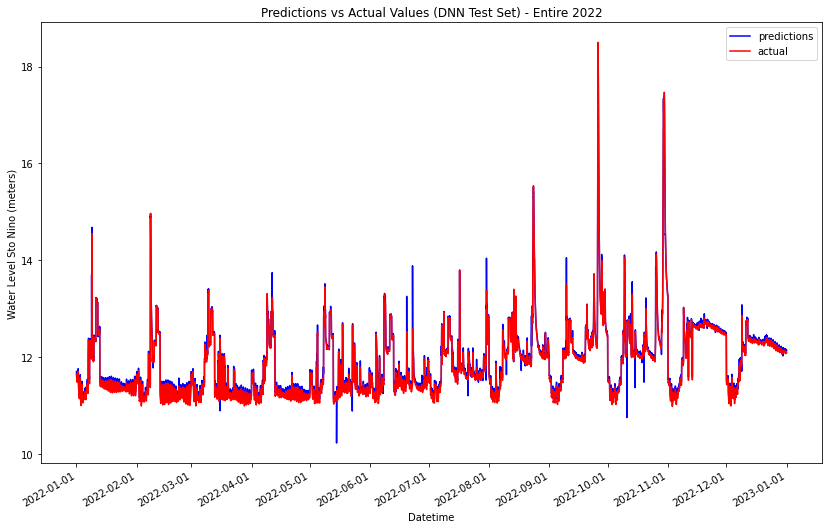

In [45]:
plt.figure(figsize=(14, 9))  # Adjust the width and height as needed
plt.plot(test_dates, dense_predictions, c = "blue", label = "predictions")
plt.plot(test_dates, actual, c = "red", label = "actual")
plt.title('Predictions vs Actual Values (DNN Test Set) - Entire 2022')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

# Set x-axis major locator to show ticks for every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Format the dates as YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()

plt.legend()
plt.show()

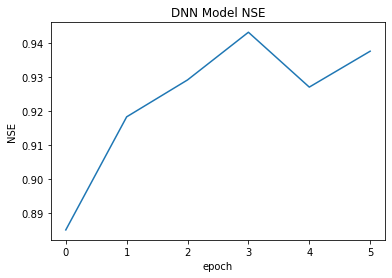

In [49]:
import keras
from matplotlib import pyplot as plt
plt.plot(dense_history.history['NSE'])
plt.title('DNN Model NSE')
plt.ylabel('NSE')
plt.xlabel('epoch')
plt.show()

# Convolutional Neural Network (CNN)

In [51]:
CONV_WIDTH = 6

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Waterlevel_Sto_Nino'])

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)
conv_model.summary()

Conv model on `conv_window`
Input shape: (32, 6, 6)
Output shape: (32, 1, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (32, 1, 64)               2368      
                                                                 
 dense_4 (Dense)             (32, 1, 64)               4160      
                                                                 
 dense_5 (Dense)             (32, 1, 64)               4160      
                                                                 
 dense_6 (Dense)             (32, 1, 1)                65        
                                                                 
Total params: 10753 (42.00 KB)
Trainable params: 10753 (42.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
conv_history = compile_and_fit(conv_model, conv_window)

performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)

Epoch 1/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0307 - mean_squared_error: 0.0307 - r_square: 0.9342 - NSE: 0.8626
Epoch 2/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0254 - mean_squared_error: 0.0254 - r_square: 0.9381 - NSE: 0.9013
Epoch 3/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - r_square: 0.9439 - NSE: 0.9002
Epoch 4/20
274/274 [==============================] - 0s 2ms/step - loss: 0.0231 - mean_squared_error: 0.0231 - r_square: 0.9457 - NSE: 0.9103
Epoch 5/20
274/274 [==============================] - 0s 1ms/step - loss: 0.0222 - mean_squared_error: 0.0222 - r_square: 0.9445 - NSE: 0.9077
Epoch 6/20
274/274 [==============================] - 0s 1ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - r_square: 0.9479 - NSE: 0.9046
Epoch 7/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0233 - mean_squared_error: 0.0233 - r_square: 0.9481 - NSE: 0.9072

In [86]:
prediction_data = test_df.values.reshape(1, -1, CONV_WIDTH)  # Add batch dimension of 1
conv_predictions = conv_model.predict(prediction_data)
actual = test_df['Waterlevel_Sto_Nino']

1/1 [==============================] - 0s 132ms/step


In [58]:
print(conv_predictions.shape)
print(actual.shape)

(1, 8755, 1)
(8760,)


In [59]:
conv_predictions = conv_predictions.reshape(8755)
actual = actual[5:]
test_dates_cnn = test_dates[5:]

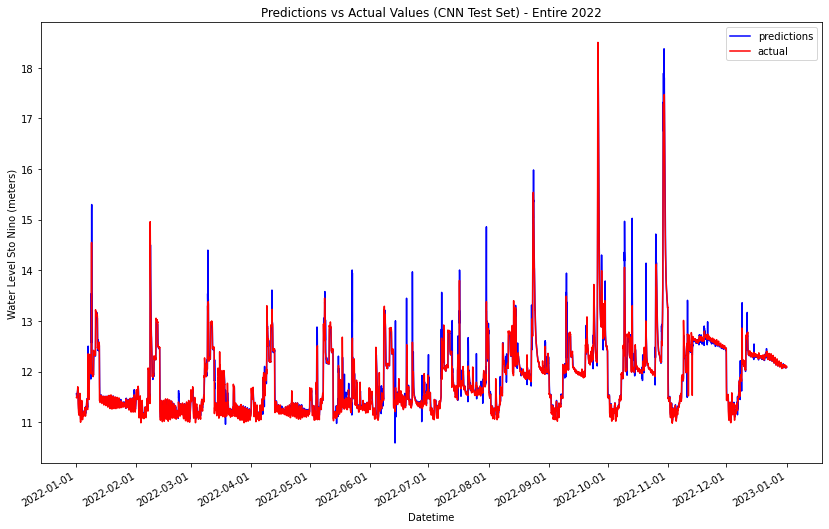

In [61]:
plt.figure(figsize=(14, 9))  # Adjust the width and height as needed
plt.plot(test_dates_cnn, conv_predictions, c = "blue", label = "predictions")
plt.plot(test_dates_cnn, actual, c = "red", label = "actual")
plt.title('Predictions vs Actual Values (CNN Test Set) - Entire 2022')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

# Set x-axis major locator to show ticks for every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Format the dates as YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()

plt.legend()
plt.show()

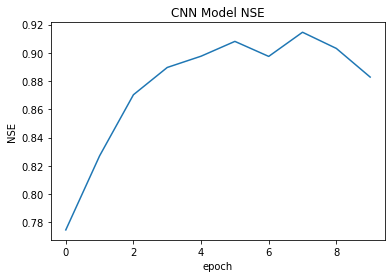

In [62]:
import keras
from matplotlib import pyplot as plt
plt.plot(conv_history.history['NSE'])
plt.title('CNN Model NSE')
plt.ylabel('NSE')
plt.xlabel('epoch')
plt.show()

# LSTM

In [87]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 6, 6)
Output shape: (32, 6, 1)


In [104]:
lstm_history = compile_and_fit(lstm_model, wide_window)

performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

Epoch 1/20
274/274 [==============================] - 4s 5ms/step - loss: 0.0298 - mean_squared_error: 0.0298 - r_square: 0.9624 - NSE: 0.8656
Epoch 2/20
274/274 [==============================] - 1s 4ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - r_square: 0.9626 - NSE: 0.9581
Epoch 3/20
274/274 [==============================] - 1s 5ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - r_square: 0.9608 - NSE: 0.9521
Epoch 4/20
274/274 [==============================] - 1s 4ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - r_square: 0.9647 - NSE: 0.9584
Epoch 5/20
274/274 [==============================] - 1s 5ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - r_square: 0.9613 - NSE: 0.9481
Epoch 6/20
274/274 [==============================] - 1s 4ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - r_square: 0.9610 - NSE: 0.9488
Epoch 7/20
274/274 [==============================] - 1s 4ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - r_square: 0.9593 - NSE: 0.9483

In [67]:
prediction_data = test_df.values.reshape(1, -1, 6)  # Add batch dimension of 1
lstm_predictions = lstm_model.predict(prediction_data)
actual = test_df['Waterlevel_Sto_Nino']

1/1 [==============================] - 1s 961ms/step


In [70]:
lstm_predictions = lstm_predictions.reshape(8760)


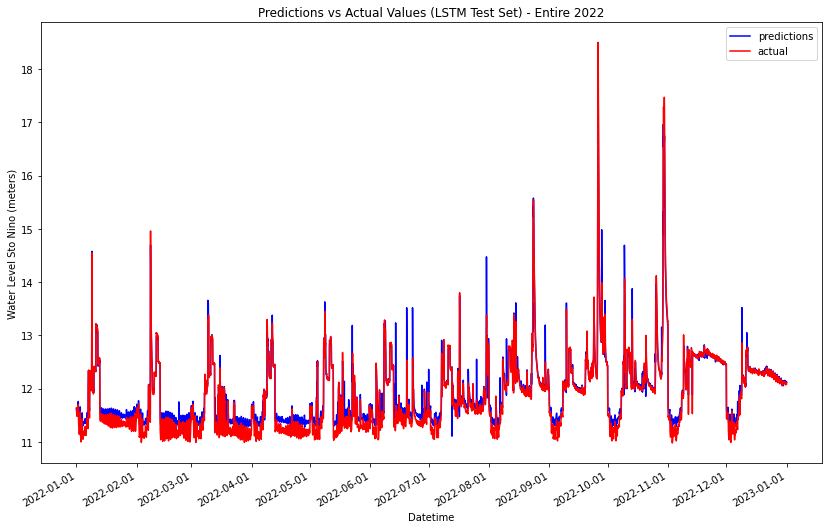

In [73]:
plt.figure(figsize=(14, 9))  # Adjust the width and height as needed
plt.plot(test_dates, lstm_predictions, c = "blue", label = "predictions")
plt.plot(test_dates, actual, c = "red", label = "actual")
plt.title('Predictions vs Actual Values (LSTM Test Set) - Entire 2022')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

# Set x-axis major locator to show ticks for every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Format the dates as YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()

plt.legend()
plt.show()

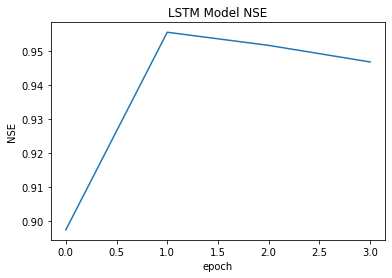

In [75]:
import keras
from matplotlib import pyplot as plt
plt.plot(lstm_history.history['NSE'])
plt.title('LSTM Model NSE')
plt.ylabel('NSE')
plt.xlabel('epoch')
plt.show()

In [105]:
performance

{'Dense': {'loss': 0.019263697788119316,
  'mean_squared_error': 0.019263697788119316,
  'r_square': 0.9573046565055847,
  'NSE': 0.9543823599815369},
 'LSTM': {'loss': 0.024549856781959534,
  'mean_squared_error': 0.024549851194024086,
  'r_square': 0.9528205990791321,
  'NSE': 0.9485882520675659}}

In [106]:
# Convert the dictionary to a DataFrame
evaluation_test_set = pd.DataFrame.from_dict(performance)

# Display the DataFrame
evaluation_test_set

,Dense,LSTM
loss,0.019264,0.024550
mean_squared_error,0.019264,0.024550
r_square,0.957305,0.952821
NSE,0.954382,0.948588
